In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msn
import easygui
from matplotlib.colors import ListedColormap


In [2]:
heart_data = pd.read_csv(r'C:\Users\ADMIN\Downloads/book1.csv')

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
1208,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
1209,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
1210,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1212 non-null   int64  
 1   sex       1212 non-null   int64  
 2   cp        1212 non-null   int64  
 3   trestbps  1212 non-null   int64  
 4   chol      1212 non-null   int64  
 5   fbs       1212 non-null   int64  
 6   restecg   1212 non-null   int64  
 7   thalach   1212 non-null   int64  
 8   exang     1212 non-null   int64  
 9   oldpeak   1212 non-null   float64
 10  slope     1212 non-null   int64  
 11  ca        1212 non-null   int64  
 12  thal      1212 non-null   int64  
 13  target    1212 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 132.7 KB


In [5]:
heart_data.shape

(1212, 14)

In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.070845,0.465433,1.030773,17.516406,51.766511,0.355756,0.525208,22.876772,0.469212,1.159636,0.615462,1.021339,0.611518,0.498217
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

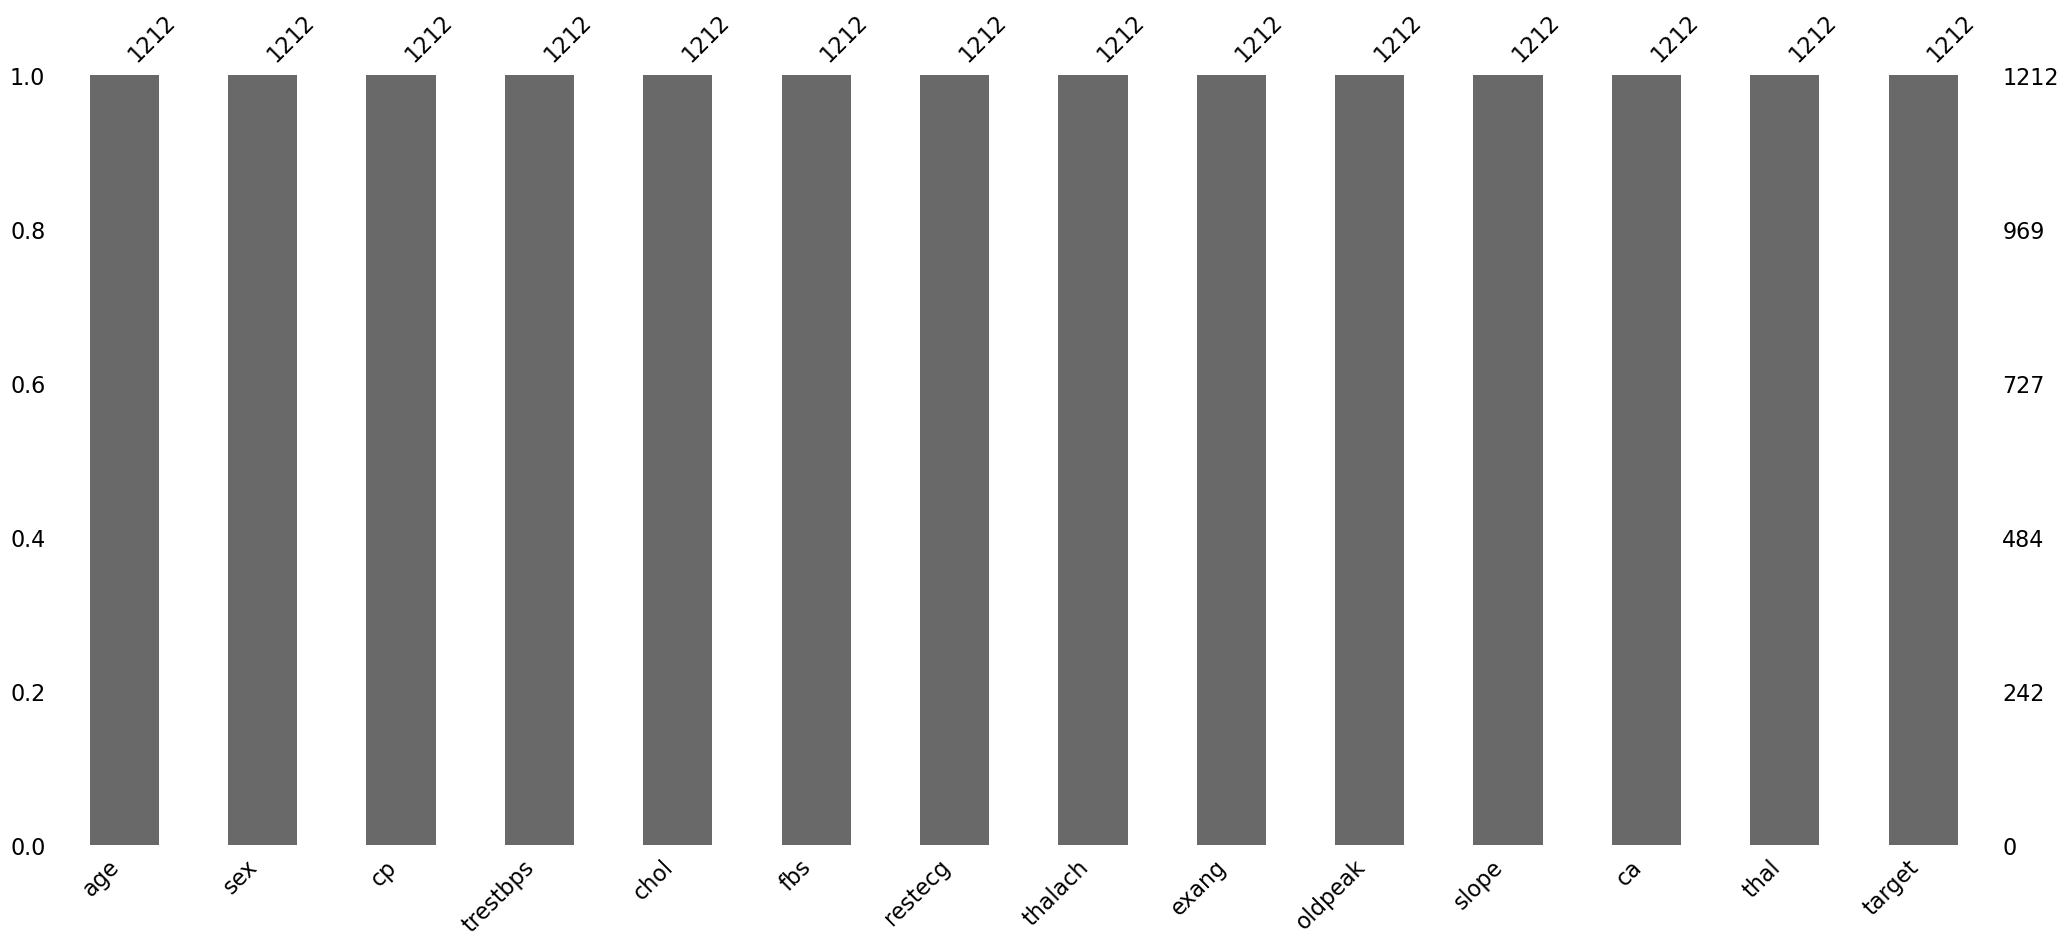

In [8]:
msn.bar(heart_data)

# Exploratory Data Analysis

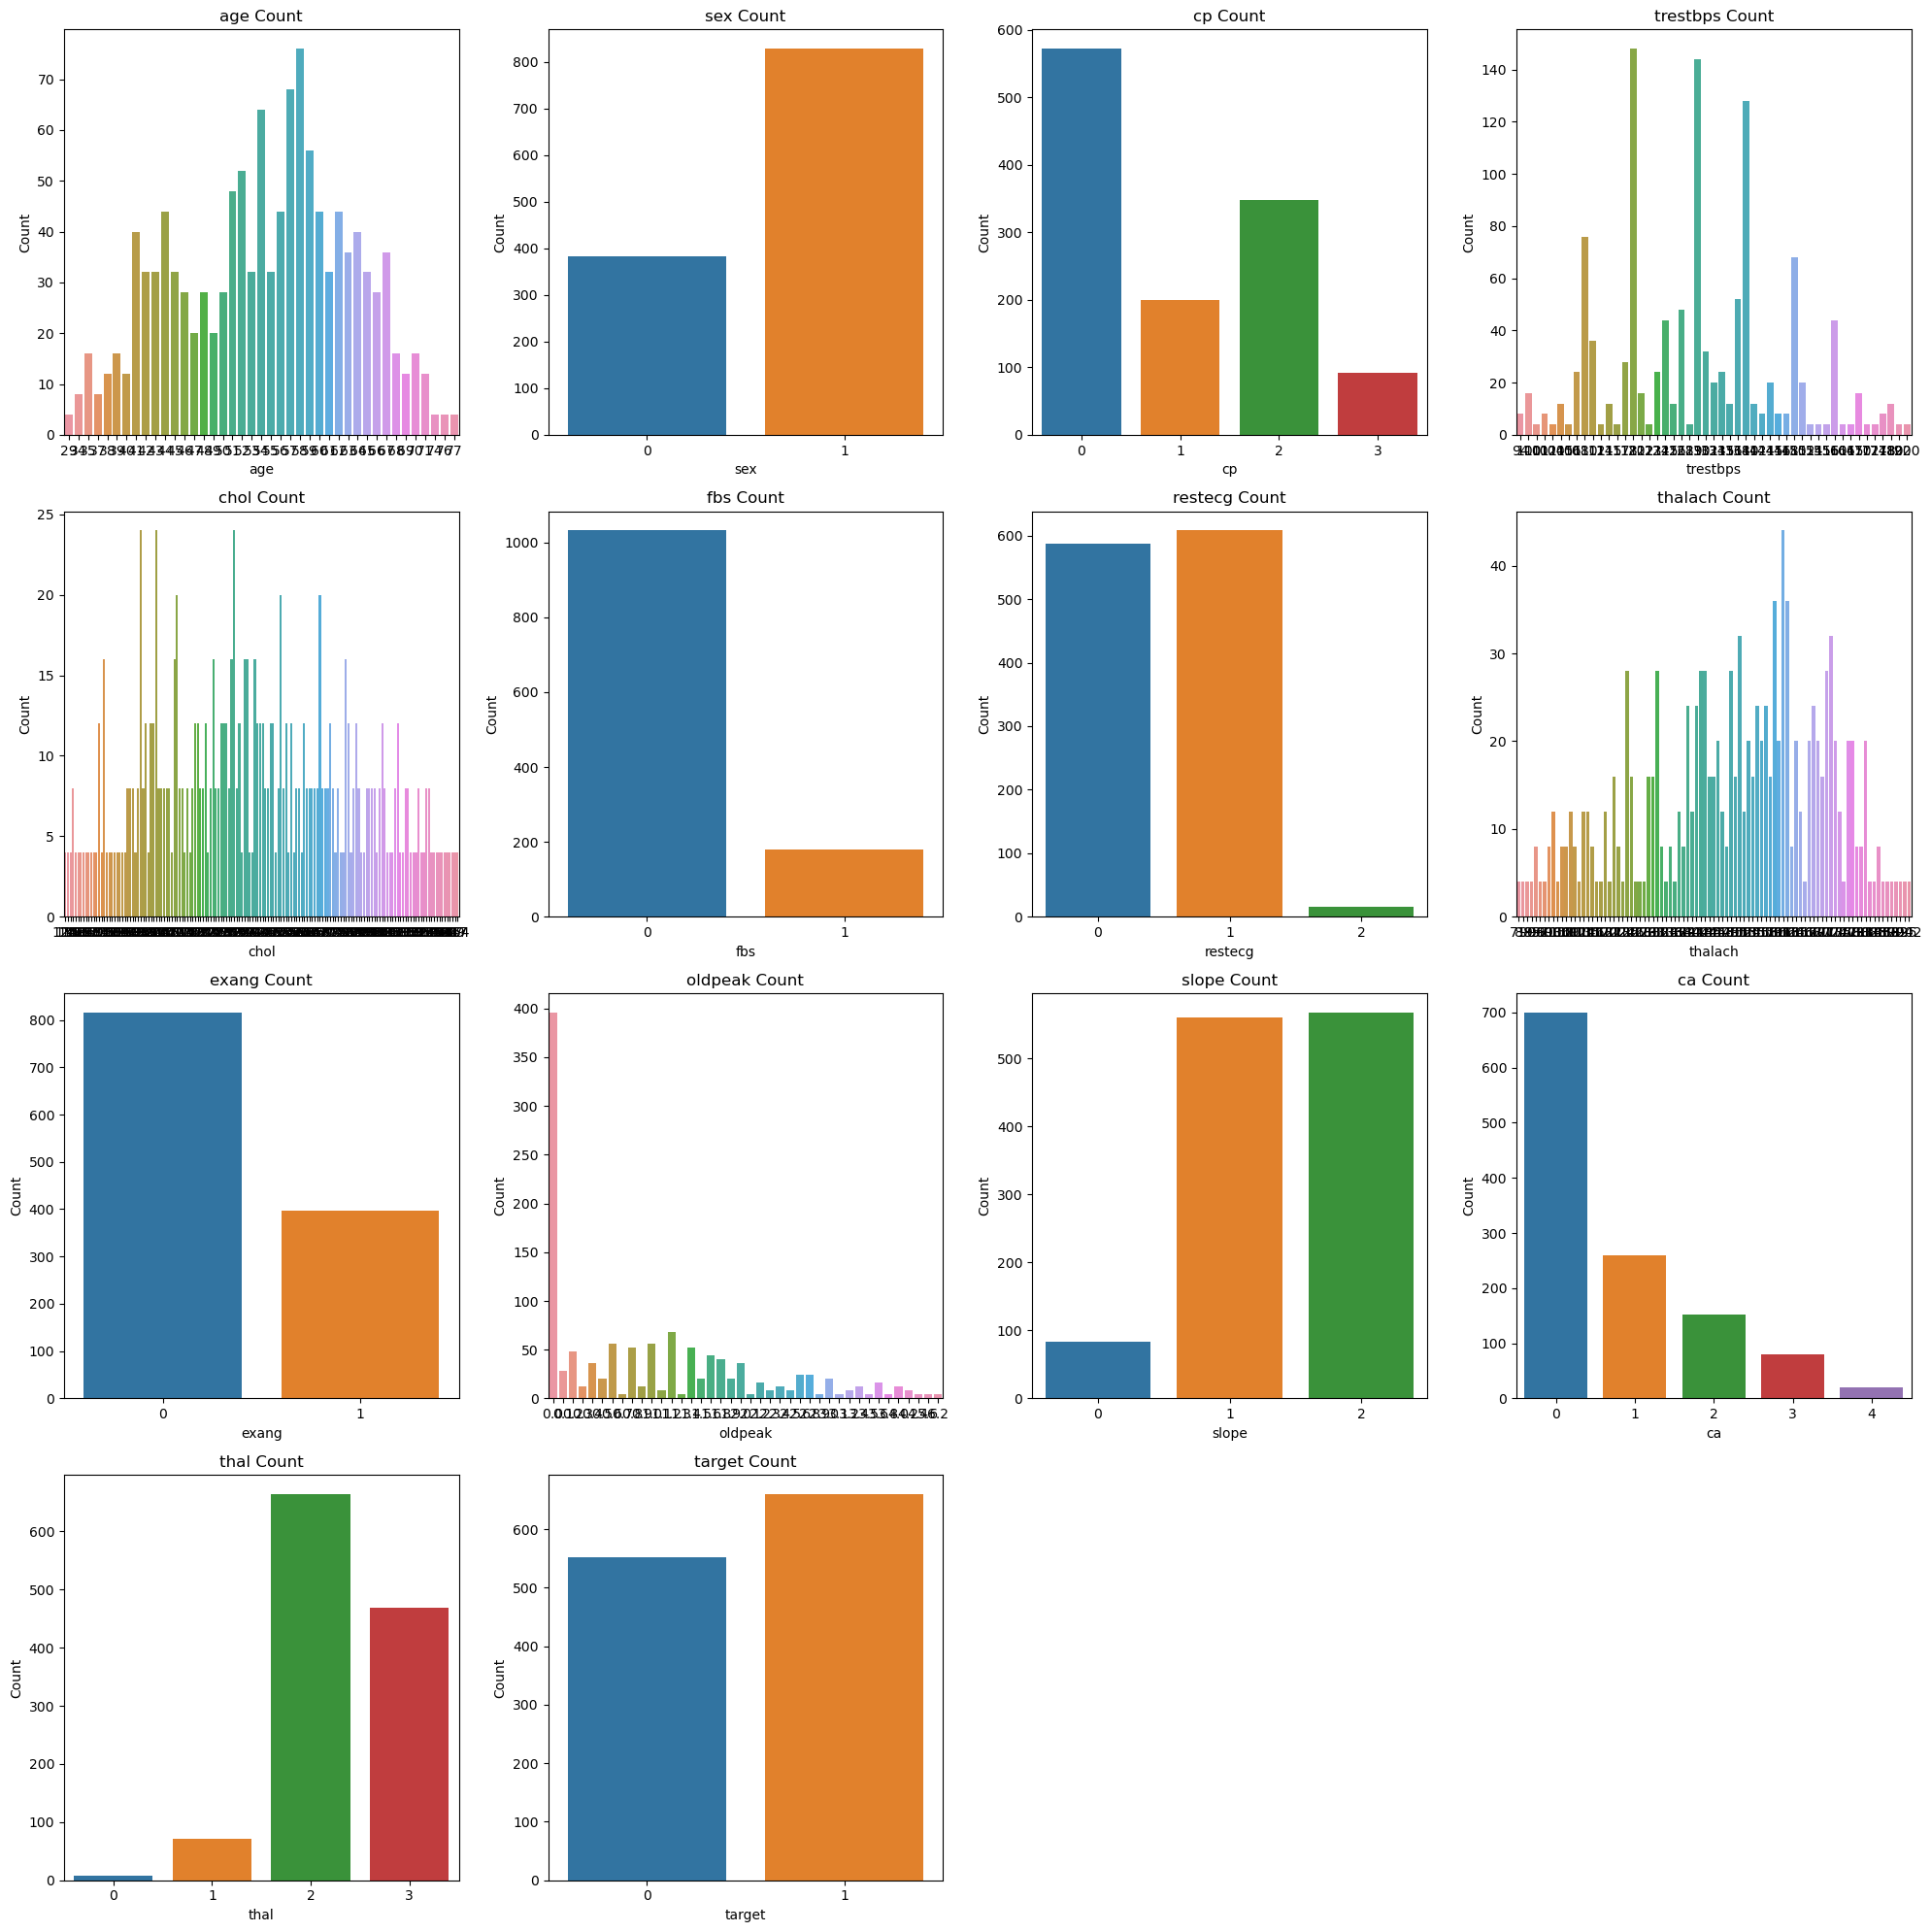

In [15]:
categorical_columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, data=heart_data)
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal target


C:\Users\ADMIN\anaconda3\projct\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\projct\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\projct\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\projct\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

ValueError: num must be an integer with 1 <= num <= 6, not 7

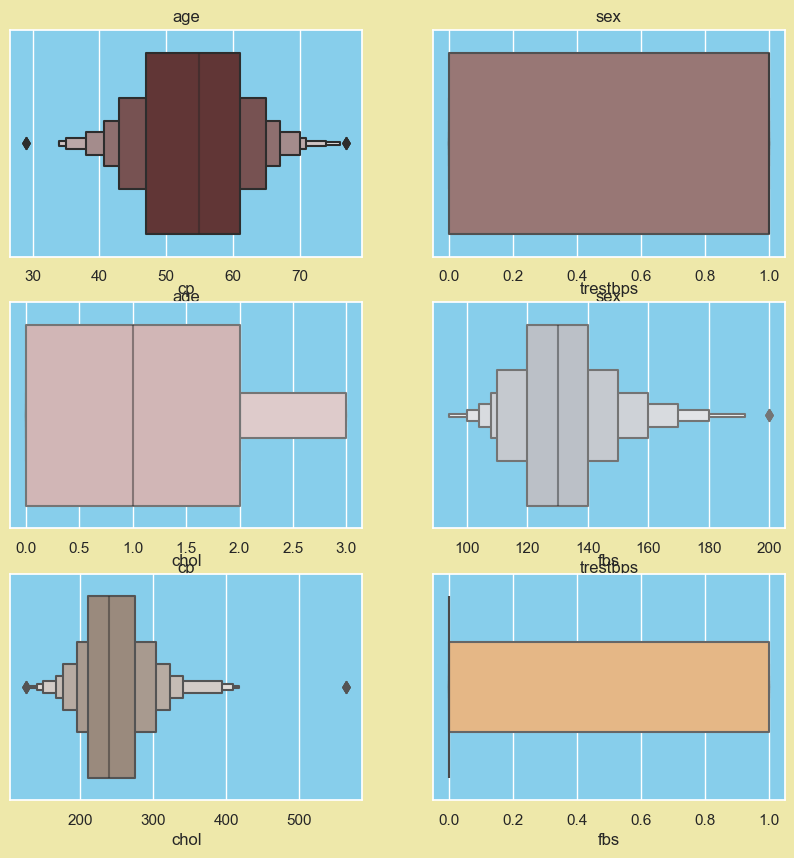

In [16]:
print('cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target')

sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(10,10))

for i, col in enumerate(heart_data):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=heart_data[col], color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)
    
plt.show()

In [ ]:
fig = px.histogram(data_frame=heart_data, x='age', color= 'sex')
fig.show()

In [19]:
corr_matrix = heart_data.corr()
print(corr_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

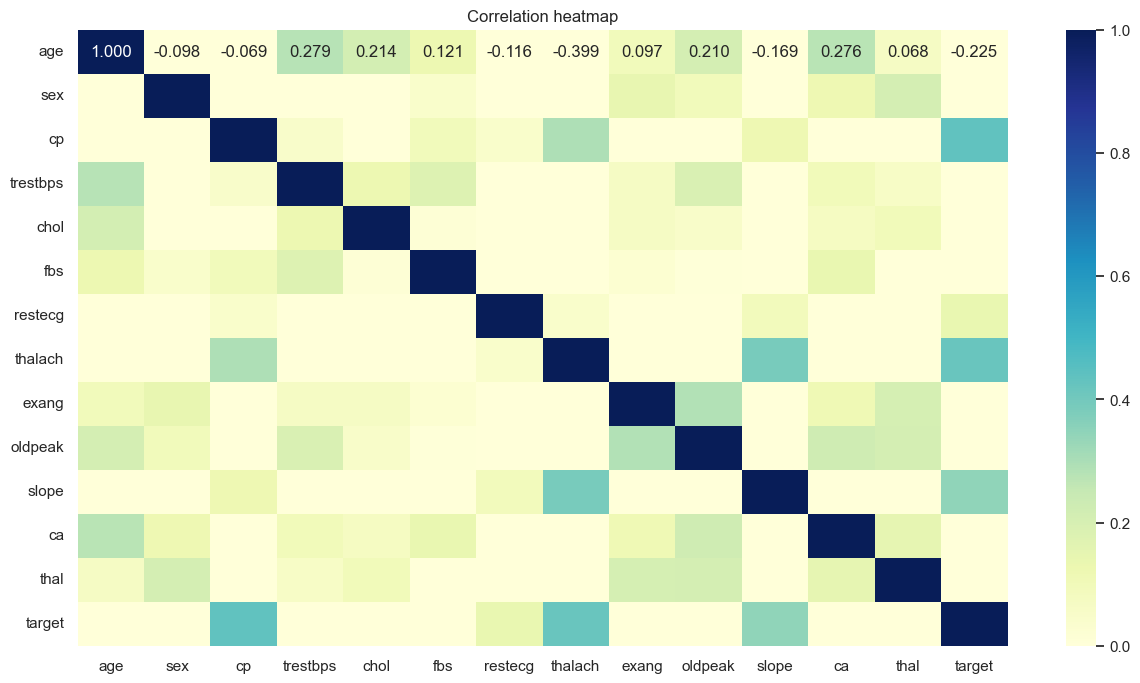

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Correlation heatmap")
plt.show()



C:\Users\ADMIN\anaconda3\projct\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\projct\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


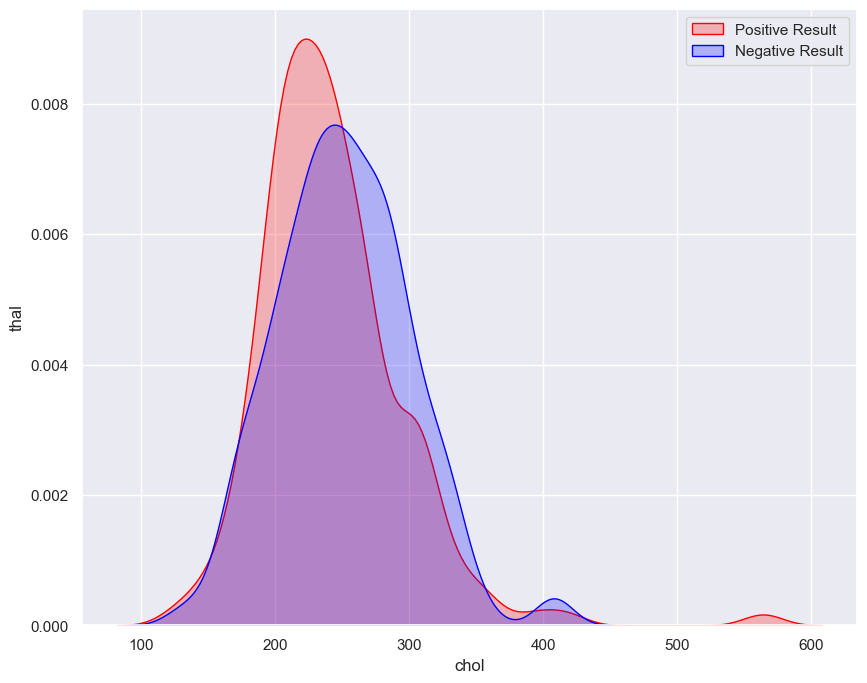

In [38]:
plt.figure(figsize = (10, 8))  
kde = sns.kdeplot(heart_data["chol"][heart_data["target"] == 1], color = "Red", fill = True)  
kde = sns.kdeplot(heart_data["chol"][heart_data["target"] == 0], ax = kde, color = "Blue", fill= True)  
kde.set_xlabel("chol")  
kde.set_ylabel("thal")  
kde.legend(["Positive Result", "Negative Result"])

<Axes: xlabel='target', ylabel='cp'>

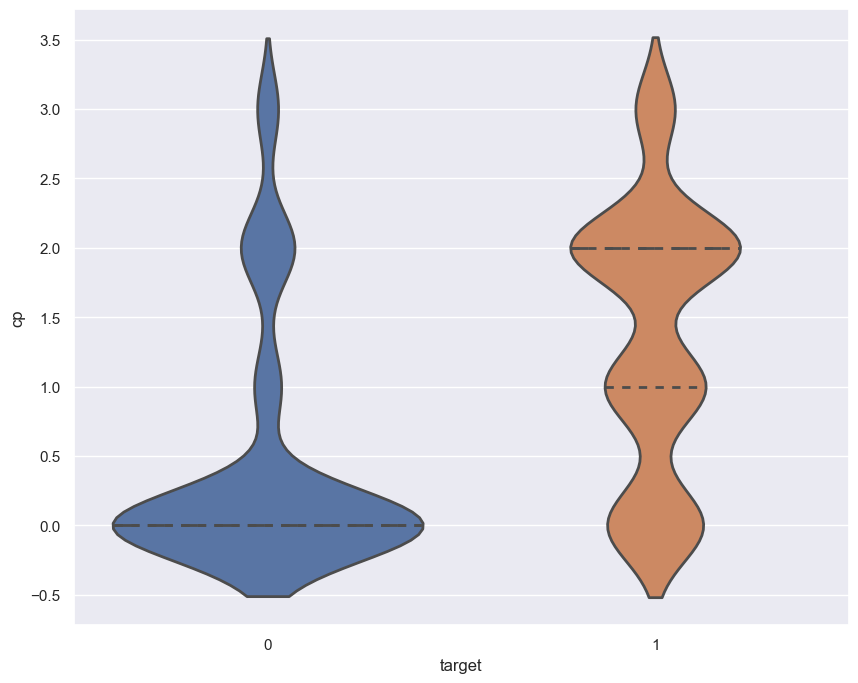

In [41]:
plt.figure(figsize = (10, 8))  
sns.violinplot(data = heart_data, x = "target", y = "cp",  
               split = True, inner = "quart", linewidth = 2)

In [9]:
heart_data.index

RangeIndex(start=0, stop=1212, step=1)

In [10]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
heart_data['target'].value_counts()

target
1    660
0    552
Name: count, dtype: int64

In [12]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [13]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      63    1   3       145   233    1        0      150      0      2.3   
1      37    1   2       130   250    0        1      187      0      3.5   
2      41    0   1       130   204    0        0      172      0      1.4   
3      56    1   1       120   236    0        1      178      0      0.8   
4      57    0   0       120   354    0        1      163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1207   57    0   0       140   241    0        1      123      1      0.2   
1208   45    1   3       110   264    0        1      132      0      1.2   
1209   68    1   0       144   193    1        1      141      0      3.4   
1210   57    1   0       130   131    0        1      115      1      1.2   
1211   57    0   1       130   236    0        0      174      0      0.0   

      slope  ca  thal  
0         0   0     1  
1         0   0     2  
2  

In [14]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
1207    0
1208    0
1209    0
1210    0
1211    0
Name: target, Length: 1212, dtype: int64


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1212, 13) (969, 13) (243, 13)


In [17]:
model = LogisticRegression()

In [18]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

C:\Users\ADMIN\anaconda3\projct\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [20]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8441692466460269


In [21]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [22]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8477366255144033


In [23]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [24]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy') 
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8441692466460269


In [27]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\ADMIN\anaconda3\projct\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
